Training set values data and labels: from here:
https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/data/


Note: you must create an account to download the data

In [85]:
file_train = "4910797b-ee55-40a7-8668-10efd5c1b960.csv" #x_train, training set values data
file_target_train = "0bf8bc6e-30d0-4c50-956a-603fc693d966.csv" #y_train, training set labels
file_test = "702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv" #x_test, test set data

Load pandas and other necessary libraries

In [104]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.preprocessing import OneHotEncoder 

Read the files, view samples of the data, and look at the columns

In [87]:
df_train = pd.read_csv(file_train)
df.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [88]:
df_train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [89]:
df_target_train = pd.read_csv(file_target_train)
df_target_train.head(5)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [90]:
df_target_train.columns

Index(['id', 'status_group'], dtype='object')

In [91]:
df_test = pd.read_csv(file_test)
df_test.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [92]:
df_test.columns #should be the same as df_train

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [93]:
# Data exploration

In [94]:
df_train['id'].count()

59400

In [95]:
df_train[df_train['amount_tsh'] == 0].count()

id                       41639
amount_tsh               41639
date_recorded            41639
funder                   38358
gps_height               41639
installer                38343
longitude                41639
latitude                 41639
wpt_name                 41639
num_private              41639
basin                    41639
subvillage               41268
region                   41639
region_code              41639
district_code            41639
lga                      41639
ward                     41639
population               41639
public_meeting           38825
recorded_by              41639
scheme_management        38457
scheme_name              18664
permit                   39011
construction_year        41639
extraction_type          41639
extraction_type_group    41639
extraction_type_class    41639
management               41639
management_group         41639
payment                  41639
payment_type             41639
water_quality            41639
quality_

In [96]:
df_train['year_recorded'] = df_train['date_recorded'].str.slice(start=0, stop=4)

In [97]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [98]:
list_a = ['gps_height', 'longitude', 'latitude', 'num_private', 
        'region_code', 'district_code', 'population', 'construction_year']

print('zero values for ints and floats')
for i in list_a:
    print(i, len(df_train[df_train[i] == 0]))

    
list_b = ['date_recorded', 'funder',
       'installer', 'wpt_name',
       'basin', 'subvillage', 'region', 'lga',
       'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group']    
print('\n\nempty values for objects')
for i in list_b:
    print(i, len(df_train[df_train[i].isnull()]))

zero values for ints and floats
gps_height 20438
longitude 1812
latitude 0
num_private 58643
region_code 0
district_code 23
population 21381
construction_year 20709


empty values for objects
date_recorded 0
funder 3635
installer 3655
wpt_name 0
basin 0
subvillage 371
region 0
lga 0
ward 0
public_meeting 3334
recorded_by 0
scheme_management 3877
scheme_name 28166
permit 3056
extraction_type 0
extraction_type_group 0
extraction_type_class 0
management 0
management_group 0
payment 0
payment_type 0
water_quality 0
quality_group 0
quantity 0
quantity_group 0
source 0
source_type 0
source_class 0
waterpoint_type 0
waterpoint_type_group 0


In [102]:
df_train['num_private'].value_counts().head()

0    58643
6       81
1       73
5       46
8       46
Name: num_private, dtype: int64

In [124]:
X_train = df_train[list_a]
y_train = df_target_train['status_group']

dtc = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=5) 
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

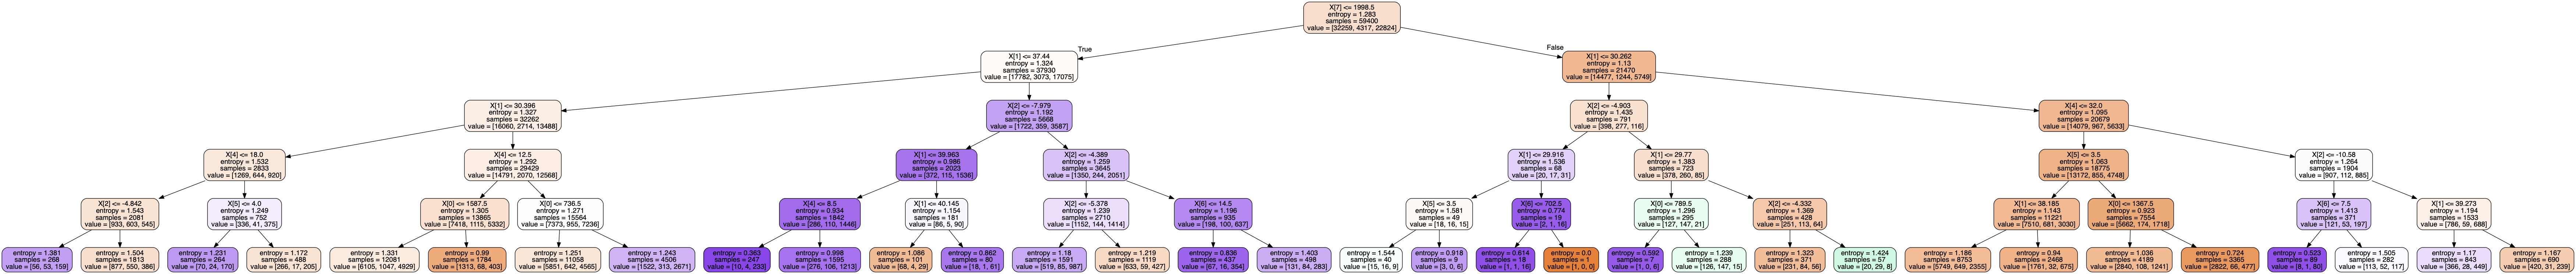

In [125]:
dot_file = StringIO()

export_graphviz(dtc, out_file=dot_file, filled=True,
               rounded=True)

image=pydotplus.graph_from_dot_data(dot_file.getvalue())
Image(image.create_png())

# One Hot Encode the non-continuous variables

In [119]:
ohe_list_c = df_train[list_c].dropna()
ohe_list_c.shape

(27813, 29)

In [120]:
onehotencoder = OneHotEncoder() 

list_c = ['funder',
       'installer', 'wpt_name',
       'basin', 'subvillage', 'region', 'lga',
       'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group']


test_data = onehotencoder.fit_transform(ohe_list_c).toarray()

In [121]:
test_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [122]:
X_train = test_data
y_train = df_target_train['status_group']

dtc = DecisionTreeClassifier(random_state=42, max_depth=5) 
dtc.fit(X_train, y_train)

ValueError: Number of labels=59400 does not match number of samples=27813